<a href="https://colab.research.google.com/github/Pavan0604/machine-learning/blob/main/Linear_regression_on_acme_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.bold text

In [ ]:
medical_charges_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(medical_charges_url, "medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x7fabe4c8aa10>)

In [ ]:
import pandas as pd

In [ ]:
medical_df = pd.read_csv("/content/medical.csv")

In [ ]:
medical_df.shape

(1338, 7)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(data_frame=medical_df,x='age',marginal='box',nbins=47,title='Distrubution of age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.

In [ ]:
#lets visualize bmi(Body mass Index)
fig = px.histogram(data_frame=medical_df, x='bmi',marginal='box',color_discrete_sequence=['red'],title='Distrubution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

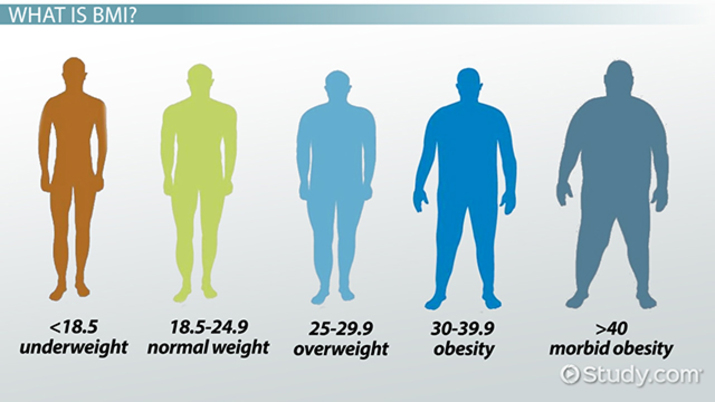

In [ ]:
#lets visualize charges
fig = px.histogram(data_frame=medical_df,x='charges',color='smoker',marginal='box',color_discrete_sequence=['green','grey'],title='Annual medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

    For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
    There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is close to $35,000.
**bold text**

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#lets visualize annual charges with respect to age
fig = px.histogram(data_frame=medical_df, x='charges',color='region',marginal='box',color_discrete_sequence=['green','blue','red','grey'],title='Distrubution of charges wrt to region')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#visualize the charges wrt sex
fig = px.histogram(data_frame=medical_df,x='charges',color='sex',marginal='box',color_discrete_sequence=['green','grey'],title='Distrubution of charges wrt to sex')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
fig = px.histogram(data_frame=medical_df,x='smoker',color='sex',title='count of smokers wrt sex')
fig.show()

In [ ]:
fig = px.histogram(data_frame=medical_df,x='smoker',color='age',title='smokers wrt age')
fig.show()

Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [ ]:
fig = px.scatter(data_frame=medical_df,x='age',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

    The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

    We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

        The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

        The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

        The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.


BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.


In [ ]:
fig = px.scatter(data_frame=medical_df,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='bmi vs charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

In [ ]:
px.violin(data_frame=medical_df, x='children',y='charges',title='charges wrt no of children')

**Correlation**

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the ***.corr*** method of a Pandas series.


In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

To compute the correlation for categorical columns, they must first be converted into numeric columns.


In [ ]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

In [ ]:
sex_values = {'female':0, 'male':1}
sex_numeric = medical_df.sex.map(sex_values)
sex_numeric

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [ ]:
medical_df.charges.corr(sex_numeric)

0.057292062202025484

Here's how correlation coefficients can be interpreted (source):

    Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

        The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

        A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

        When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

    Direction: The sign of the correlation coefficient represents the direction of the relationship.

        Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

        Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.


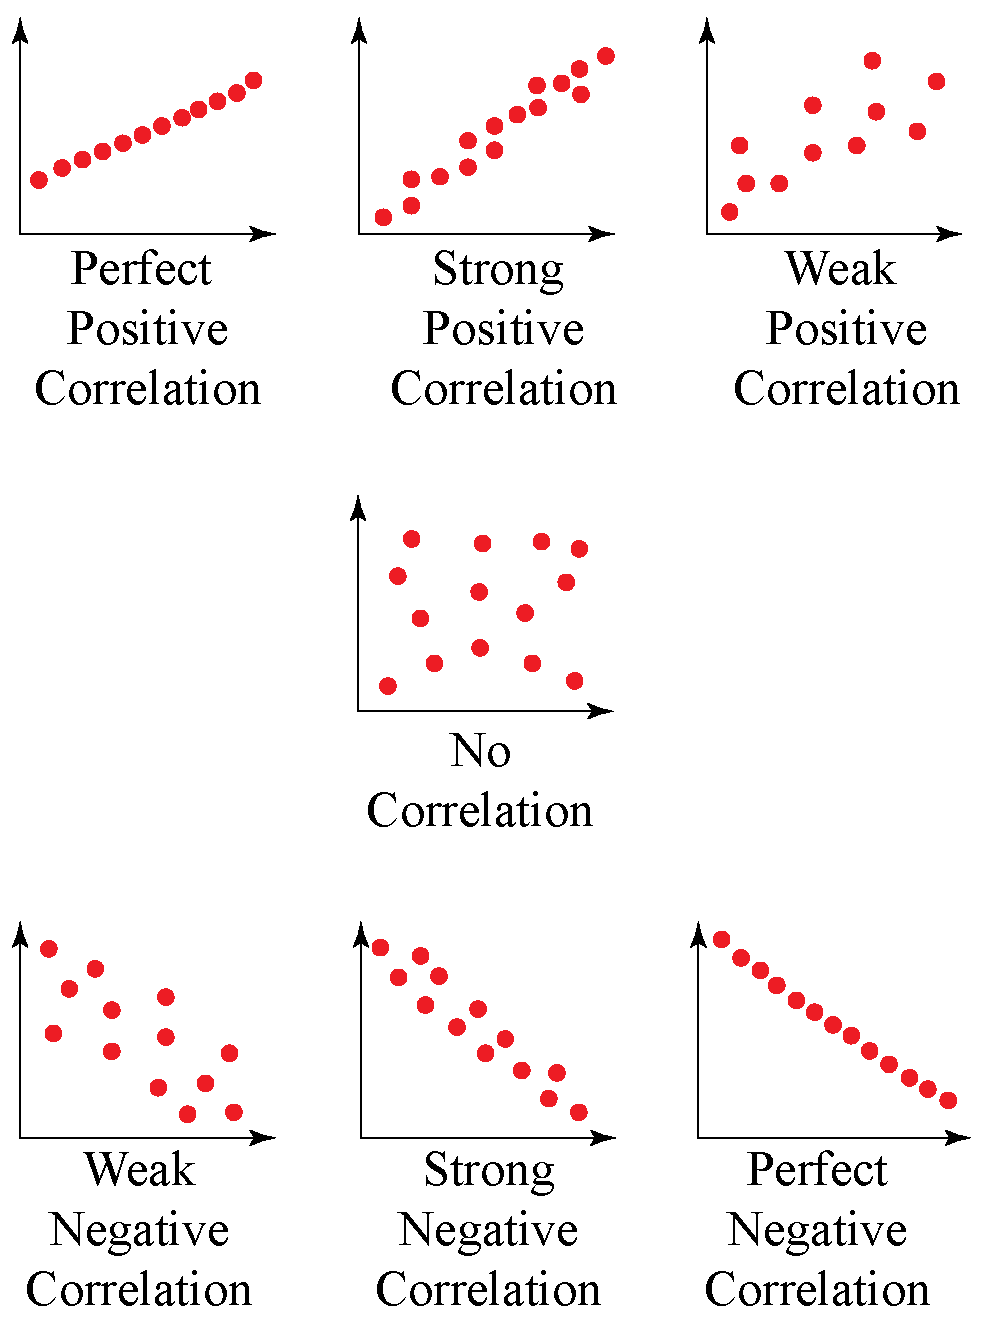

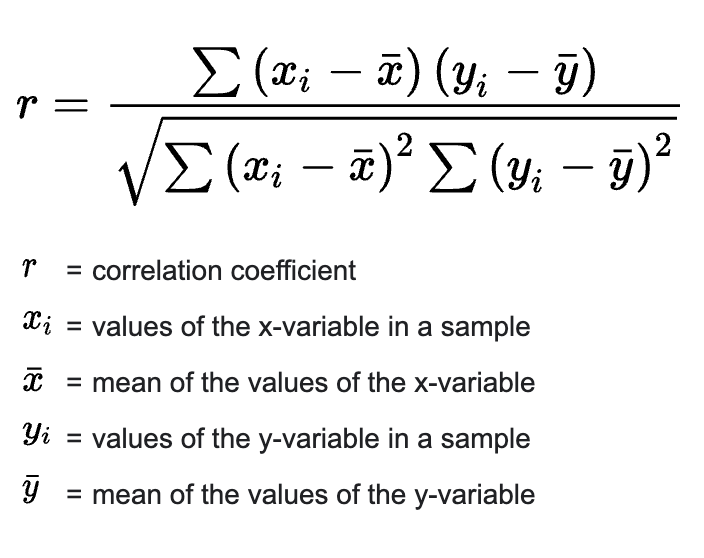

In [ ]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The result of .corr is called a correlation matrix and is often visualized using a heatmap.


In [ ]:
px.scatter(data_frame=medical_df,x='age',y='charges')

Text(0.5, 1.0, 'correlation heatmap')

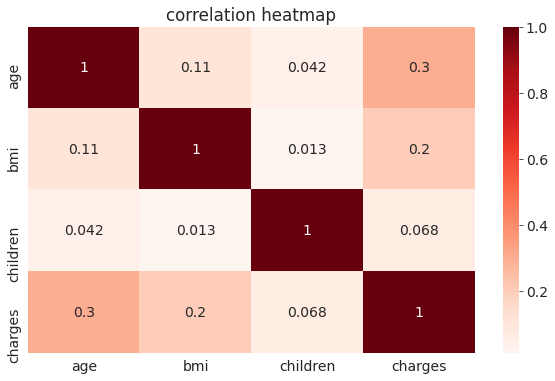

In [ ]:
sns.heatmap(medical_df.corr(), cmap='Reds',annot=True)
plt.title('correlation heatmap')

Correlation vs causation fallacy: Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features X
and Y can be correlated if X causes Y or if Y causes X, or if both are caused independently by some other factor Z, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that X are Y

simply appear to be correlated because the sample is too small.

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

# ***Linear Regression using a Single Feature***

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.


In [ ]:
no_smoker_df = medical_df[medical_df.smoker == 'no']
no_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


Now lets visualize the relation b/w age & charges for non smokers 

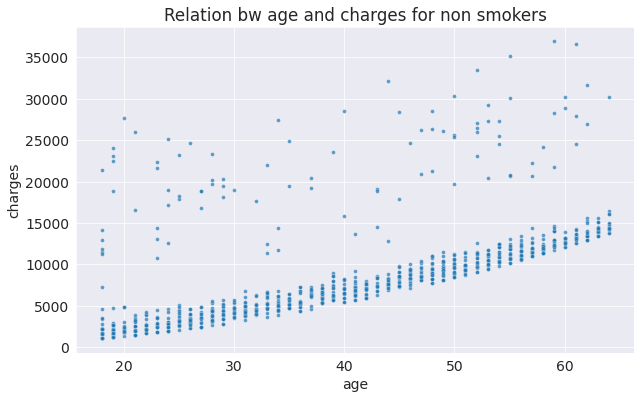

In [ ]:
plt.title('Relation bw age and charges for non smokers')
sns.scatterplot(data=no_smoker_df,x='age',y='charges',alpha=0.7,s=15)

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

y=wx+b

The line is characterized two numbers: w (called "slope") and b (called "intercept").

# ***MODEL:***

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

# ***charges= w×age + b***

We'll try determine w and b for the line that best fits the data.

This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.

 The numbers w and b are called the parameters or weights of the model.

The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".

Let define a helper function estimate_charges, to compute charges given age, w and b.

In [ ]:
def estimate_charges(age,w,b):
  return w*age+b

The estimate_charges function is our very first model.

Let's guess the values for w
and b and use them to estimate the value for charges.

In [ ]:
estimate_charges(20,5,1000)

1100

In [ ]:
w=50
b=100

In [ ]:
ages = no_smoker_df['age']
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [ ]:
estimated_charges = estimate_charges(ages,w,b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
no_smoker_df['charges']

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'estimated charges')

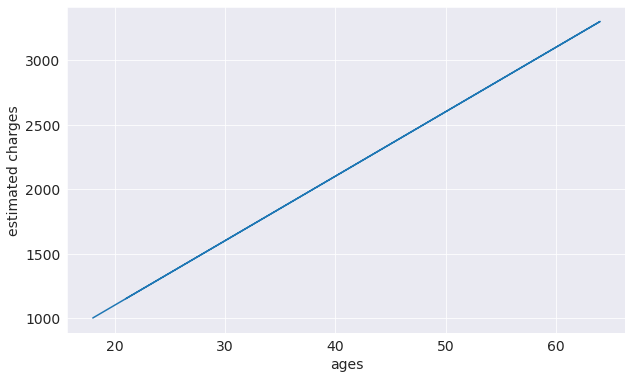

In [ ]:
plt.plot(ages,estimated_charges)
plt.xlabel('ages')
plt.ylabel('estimated charges')

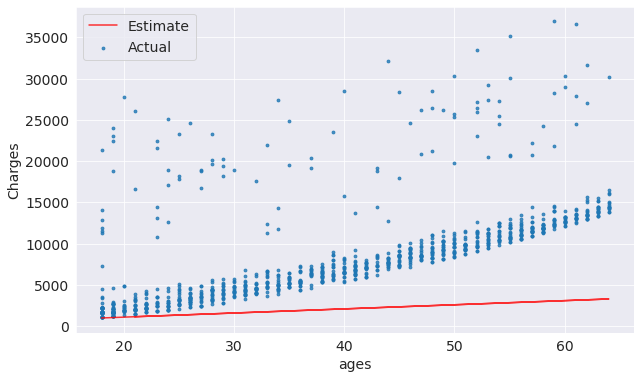

In [ ]:
target = no_smoker_df['charges']

plt.plot(ages,estimated_charges, 'r',alpha=0.8)

plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('ages')
plt.ylabel('Charges')
plt.legend(['Estimate','Actual'])

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of w
and b to move the line around. Let's define a helper function try_parameters which takes w and b as inputs and creates the above plot.

In [ ]:
def try_parameters(w,b):
  ages = no_smoker_df['age']
  target = no_smoker_df['charges']

  estimated_charges = estimate_charges(ages,w,b)

  plt.plot(ages,estimated_charges,'r',alpha=0.8)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('age')
  plt.ylabel('estimated charges')
  plt.legend(['Estimate','Actual'])

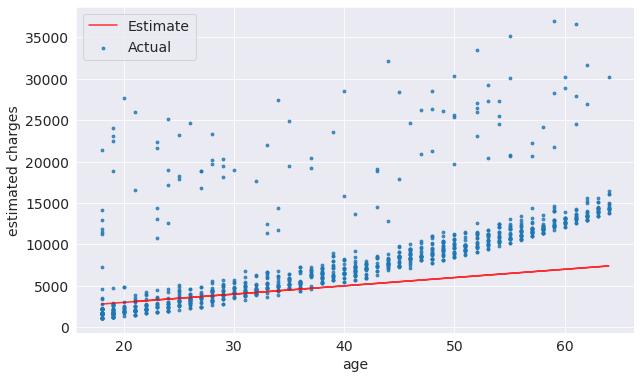

In [ ]:
try_parameters(100, 1000)

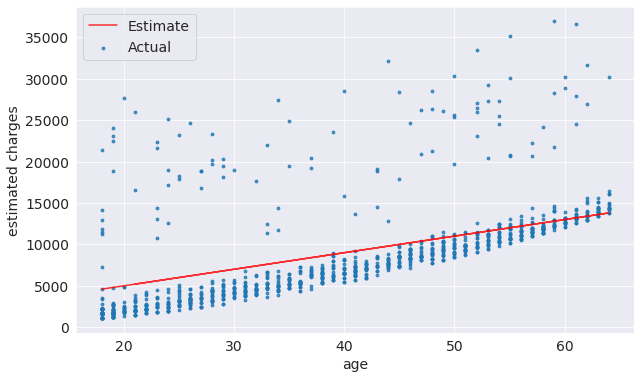

In [ ]:
try_parameters(200,1000)

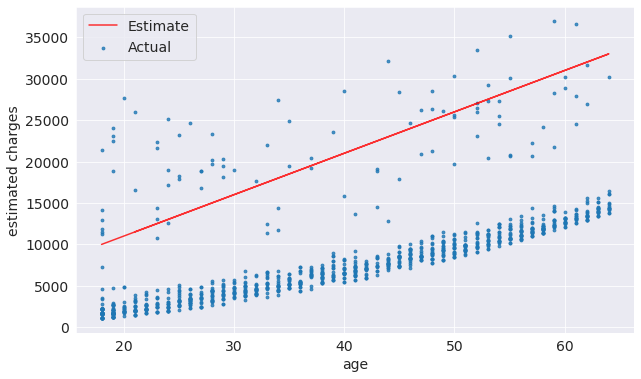

In [ ]:
try_parameters(500,1000)

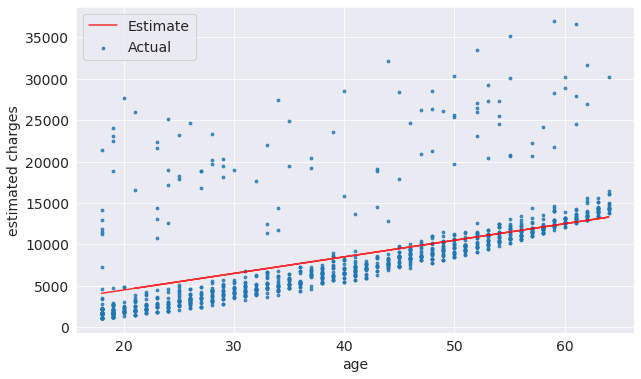

In [ ]:
try_parameters(200,500)

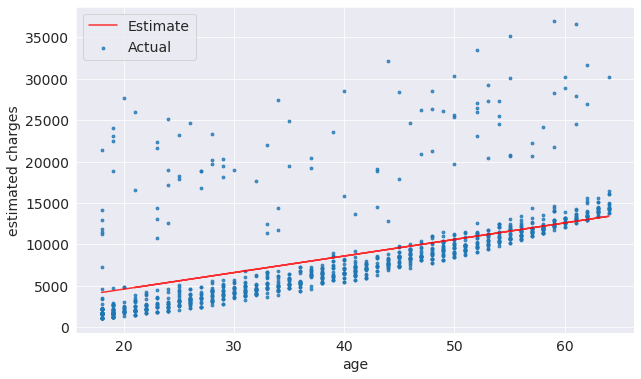

In [ ]:
try_parameters(200,600)

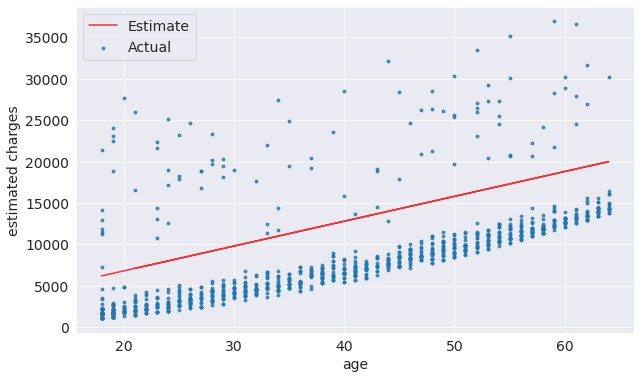

In [ ]:
try_parameters(300,800)

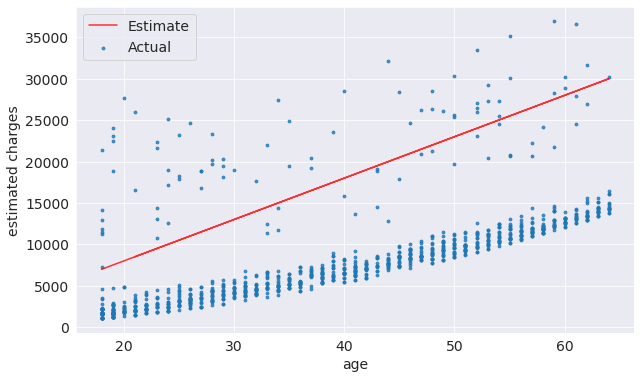

In [ ]:
try_parameters(500,-2000)

As we change the values, of w
and b

manually, trying to move the line visually closer to the points, we are learning the approximate relationship between "age" and "charges".

Wouldn't it be nice if a computer could try several different values of w and b and learn the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

We need a way to measure numerically how well the line fits the points.Once the "measure of fit" has been computed, we need a way to modify w and b to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine w and b for the best fit line, starting from a random guess.

# ***Loss/Cost Function***

We can compare our model's predictions with the actual targets using the following method:

1. Calculate the difference between the targets and predictions (the differenced is called the "residual") 
2. Square all elements of the difference  to remove negative values.
3. Calculate the average of the elements in the resulting matrix.
4. Take the square root of the result
5. The result is a single number, known as the root mean squared error (RMSE). 

The above description can be stated mathematically as follows:

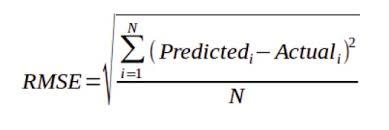



Geometrically, the residuals can be visualized as follows:



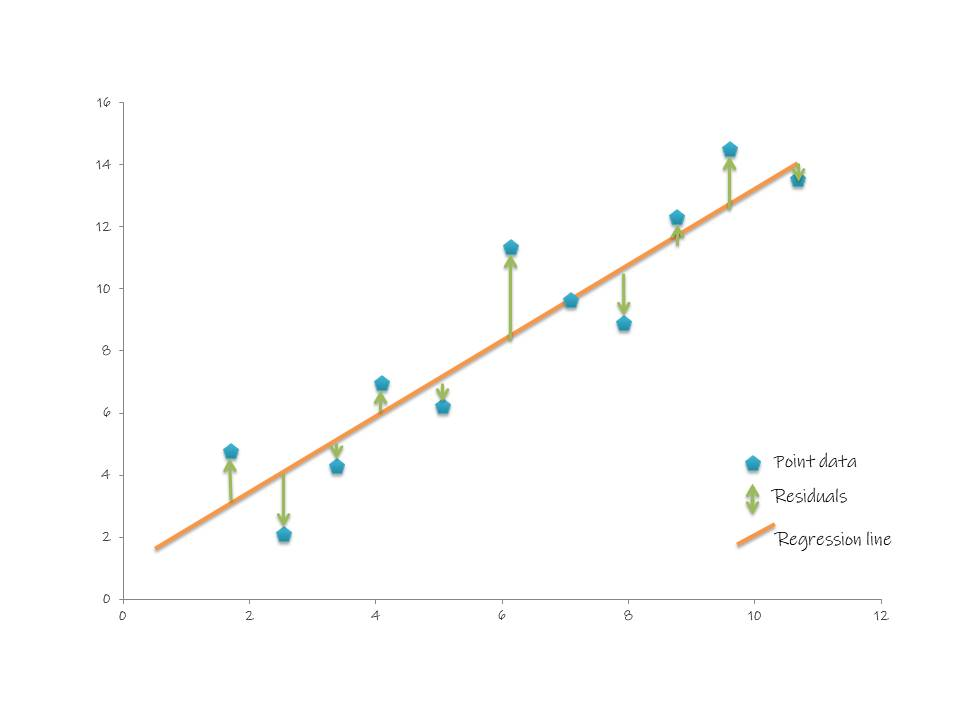

In [ ]:
targets = no_smoker_df['charges']
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
import numpy as np


In [ ]:
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

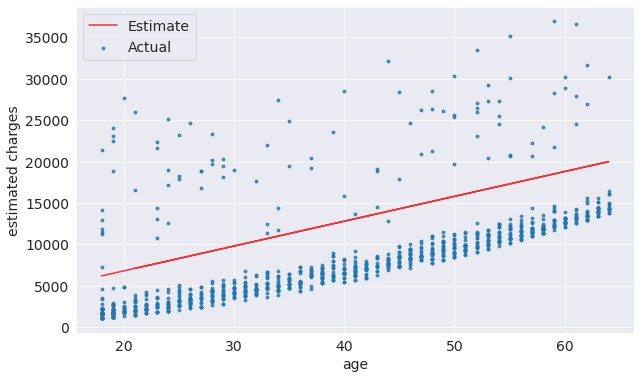

In [ ]:
try_parameters(300,800)

In [ ]:
targets = no_smoker_df['charges']

In [ ]:
w=50
b=100
prediction = estimate_charges(no_smoker_df['age'],50,100)
prediction

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
rmse(targets,prediction)

8461.949562575488

Here's how we can interpret the above number: On average, each element in the prediction differs from the actual target by $8461.

The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the try_parameters functions to also display the loss.


In [ ]:
def try_parameters(w,b):
  ages = no_smoker_df['age']
  target = no_smoker_df['charges']
  predicted = estimate_charges(ages,w,b)

  plt.plot(ages,predicted,'r',alpha=0.8)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('ages')
  plt.ylabel('estimated charges')
  plt.legend(['estimate','actual'])

  print('rmse value of given model is {}'.format(rmse(target,predicted)) )

rmse value of given model is 6414.6386896030435


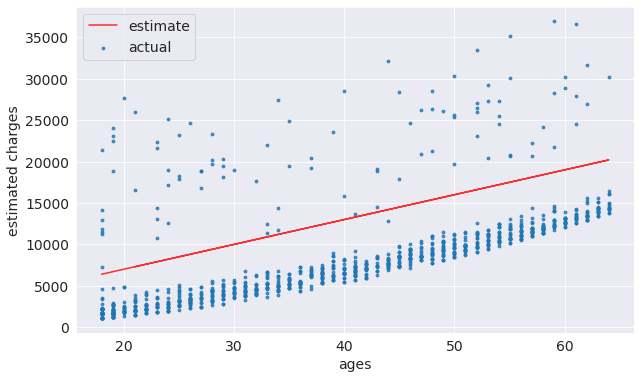

In [ ]:
try_parameters(300,1000)

# ***Optimizer***

Next, we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data.

Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)

Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for w and b using matrix operations, while gradient descent uses a iterative approach, starting with a random values of w and b and slowly improving them using derivatives.

Here's a visualization of how gradient descent works:

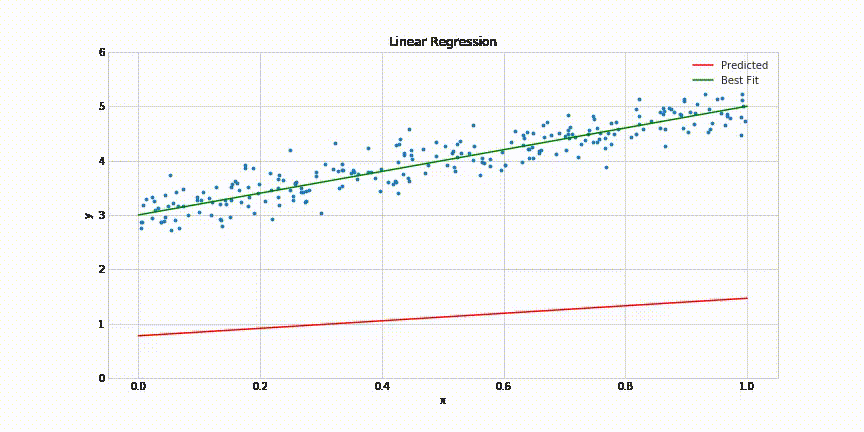

# ***Linear Regression using Scikit-learn***

In practice, you'll never need to implement either of the above methods yourself. You can use a library like scikit-learn to do this for you.


Let's use the LinearRegression class from scikit-learn to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.


In [ ]:
from sklearn.linear_model import LinearRegression

First, we create a new model object.


In [ ]:
model = LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



# Not that the input X must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.


In [ ]:
inputs = no_smoker_df[['age']]
targets = no_smoker_df['charges']
print('inputs shape: ',inputs.shape)
print('targets shape: ',targets.shape)

inputs shape:  (1064, 1)
targets shape:  (1064,)


Next, we can use the fit method of the model to find the best fit line for the inputs and targets.


In [ ]:
model.fit(inputs, targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61


In [ ]:
model.predict([[23],[37],[61]])

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)

In [ ]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Let's compute the RMSE loss to evaluate the model.


In [ ]:
rmse(targets, predictions)

4662.505766636391

Seems like our prediction is off by $4000 on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the coef_ and intercept_ properties.


In [ ]:
#w / slope
model.coef_

array([267.24891283])

In [ ]:
#b / intercept
model.intercept_

-2091.4205565650864

Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.


rmse value of given model is 4662.505766636391


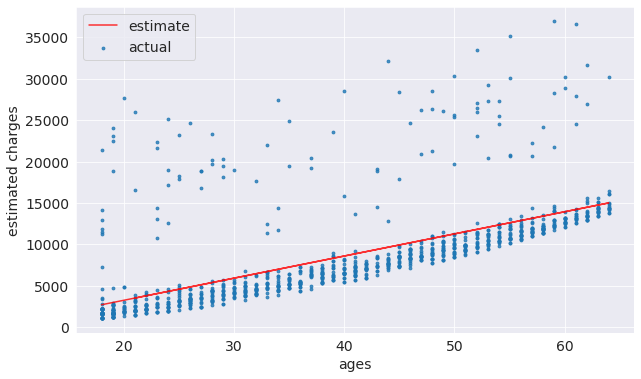

In [ ]:
try_parameters(model.coef_, model.intercept_)

In [ ]:
smokers_df = medical_df[medical_df['smoker']=='yes']

In [ ]:
smokers_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [ ]:
inputs = smokers_df[['age']]
targets = smokers_df['charges']


In [ ]:
model.fit(inputs, targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = model.predict(inputs)

In [ ]:
rmse(targets, predictions)

10711.00334810241

In [ ]:
model.coef_

array([305.23760211])

In [ ]:
model.intercept_

20294.128126915966

rmse value of given model is 24338.50287259921


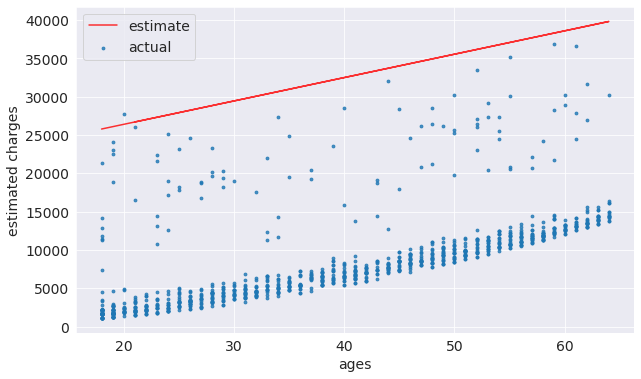

In [ ]:
try_parameters(model.coef_, model.intercept_)

# ***### Machine Learning***

Congratulations, you've just trained your first _machine learning model!_ Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets. 

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

We'll look at several examples of each of the above in future tutorials. Here's how the relationship between these three components can be visualized:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

In [ ]:
#Create inputs and targets
inputs, targets = no_smoker_df[['age']], no_smoker_df['charges']

# Create and Train the Model
model = LinearRegression().fit(inputs, targets)

#Generate Predictions
prediction = model.predict(inputs)

#compute loss to evaluate the model
loss = rmse(targets, prediction)
print("loss is ",loss)

#Slope And intercept of the function
print("Slope is ",model.coef_)

print("Intercept is ",model.intercept_)

loss is  4662.505766636391
Slope is  [267.24891283]
Intercept is  -2091.4205565650864


## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [ ]:
#Create inputs and Targets
inputs, targets = no_smoker_df[['age','bmi']], no_smoker_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)

#predict using the model
predictions = model.predict(inputs)

#compute loss using rmse
loss = rmse(targets, predictions)
print("loss is ",loss)

loss is  4662.312835461298


We can see bmi data didn't cause so much difference in loss since bmi is not highly correlated with charges


In [ ]:
no_smoker_df['charges'].corr(no_smoker_df['bmi'])

0.08403654312833268

In [ ]:
fig = px.scatter(no_smoker_df, x='bmi',y='charges',title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
#parameters of model
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

Now lets try and visualize relationship between three variables like 'age', 'bmi' and 'charges'

In [ ]:
fig = px.scatter_3d(no_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size =5, marker_opacity=0.5)
fig.show()

As we can see when we plot the graph in 3D it becomes more harder to interpet the data

Now lets move one step forward and add other variable for the model ,and add the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [ ]:
no_smoker_df['charges'].corr(no_smoker_df['children'])

0.13892870453542194

In [ ]:
fig = px.strip(no_smoker_df, x='children', y='charges',title='Children Vs charges')
fig.update_traces(marker_size=5, marker_opacity=0.7)
fig.show()

In [ ]:
#create the inputs and targets
inputs, targets = no_smoker_df[['age','bmi','children']], no_smoker_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)

#predict the values
prediction = model.predict(inputs)

#calculate the loss function
loss = rmse(targets, prediction)
print("Loss is ", loss)

Loss is  4608.470405038245


Lets Train the model on whole dataset Now

In [ ]:
#lets create inputs and targets
inputs, targets = medical_df[['age','bmi','children']], medical_df['charges']

#Create model and train the model
model = LinearRegression().fit(inputs, targets)

#Make Predictions using the model
predictions = model.predict(inputs)

#calculate loss
loss = rmse(targets, predictions)
print("Loss is ",loss)

Loss is  11355.317901125969


In [ ]:
px.scatter(medical_df, x='age',y='charges',color='smoker')

## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals




## Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".


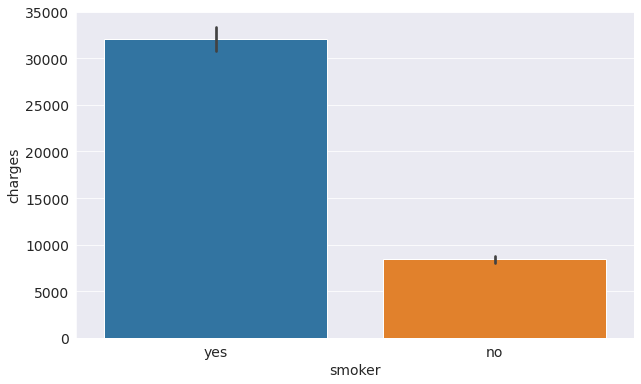

In [ ]:
sns.barplot(data=medical_df,x="smoker",y="charges")

In [ ]:
smoker_codes = {'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df['smoker'].map(smoker_codes)

In [ ]:
medical_df['smoker_code']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker_code, Length: 1338, dtype: int64

In [ ]:
medical_df['charges'].corr(medical_df['smoker_code'])

0.787251430498478

We can now use the `smoker_df` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [ ]:
#create inputs and targets
inputs, targets = medical_df[['age','bmi','children','smoker_code']], medical_df['charges']

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#predict the targets
predictions = model.predict(inputs)

#calculate the loss
loss = rmse(targets, predictions)
print("loss is ",loss)

loss is  6056.439217188077


The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.


Let's try adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

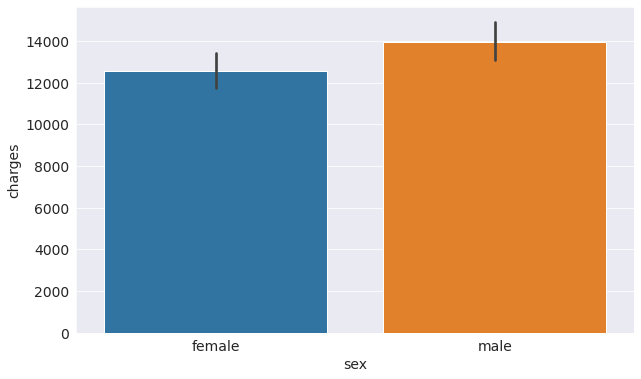

In [ ]:
sns.barplot(data=medical_df, x='sex',y='charges')

In [ ]:
px.violin(data_frame=medical_df, x='sex',y='charges')

In [ ]:
sex_codes = {'female':0, 'male':1}
medical_df['sex_codes'] = medical_df['sex'].map(sex_codes)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
medical_df['charges'].corr(medical_df['sex_codes'])

0.057292062202025484

In [ ]:
#Create the inputs and targets
inputs, targets = medical_df[['age','bmi','children','smoker_code','sex_codes']], medical_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)

#predict the target values
predictions = model.predict(inputs)

#calculate the loss
loss = rmse(targets, predictions)
print("loss is",loss)

loss is 6056.100708754539



### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)


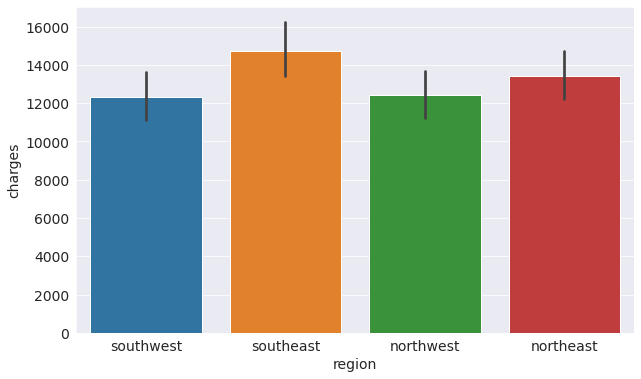

In [ ]:
sns.barplot(data=medical_df, x='region',y='charges')

In [ ]:
from sklearn import  preprocessing


In [ ]:
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
enc.transform([['northeast'],['southwest']]).toarray()

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
#Create the inputs and targets
input_cols = ['age','bmi','children','smoker_code','sex_codes','northeast','northwest','southeast','southwest']
inputs, targets = medical_df[input_cols] ,medical_df['charges']

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#predict the target values
predictions = model.predict(inputs)

#Calculate the loss
loss = rmse(targets, predictions)
print("loss is ",loss)

#see slope and intercept
print(model.coef_)
print(model.intercept_)

loss is  6041.679651174453
[  256.85635254   339.19345361   475.50054515 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
-12525.547811195444


In [ ]:
medical_df[input_cols].loc[10]

age            25.00
bmi            26.22
children        0.00
smoker_code     0.00
sex_codes       1.00
northeast       1.00
northwest       0.00
southeast       0.00
southwest       0.00
Name: 10, dtype: float64

In [ ]:
model.predict([[28,25,2,0,1,0,0,1,0]])

array([3517.94031666])

## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model. 

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights. 

In [ ]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
weights_df = pd.DataFrame(
    {
        'features': np.append(input_cols,'b'),
        'weights': np.append(model.coef_, model.intercept_)
    }
)
weights_df

,features,weights
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_codes,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,b,-12525.547811


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_output = scaler.transform(medical_df[numeric_cols])
scaled_output

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
cate_col = ['smoker_code','sex_codes','northeast','northwest','southeast','southwest']
categ_values = medical_df[cate_col].values
categ_values

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [ ]:
inputs = np.concatenate((scaled_output,categ_values),axis=1)

In [ ]:
inputs[0]

array([-1.43876426, -0.45332   , -0.90861367,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

In [ ]:
targets = medical_df['charges']

In [ ]:
#Create and train the model
model = LinearRegression().fit(inputs,targets)

#predict the values
prediction = model.predict(inputs)

#calculate loss
loss = rmse(targets, prediction)
print("loss is ",loss)

loss is  6041.679651174453


In [ ]:
model.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
model.intercept_

8466.483215411828

In [ ]:
weights_df = pd.DataFrame(
    {
        'features': np.append(numeric_cols+cate_col,'b'),
        'weights': np.append(model.coef_, model.intercept_)
    }
)
weights_df

,features,weights
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
3,smoker_code,23848.534542
4,sex_codes,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,b,8466.483215


In [ ]:
new_customer = [[28,25,2,0,1,0,0,1,0]]

In [ ]:
scaled_customer  = scaler.transform([[28,25,2]])
scaled_customer

array([[-0.79795355, -0.92904899,  0.75107928]])

In [ ]:
model.predict([[-0.79795355, -0.92904899,  0.75107928,0,1,0,0,1,0]])

array([3517.94031575])

### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

We'll apply this process to several problems in future tutorials.


### Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets,test_size=0.1)

In [ ]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6139.670043863998


In [ ]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6033.589968627654
